In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
# data import
data = pd.read_csv('./train.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
print(data.shape)

(31962, 3)


<AxesSubplot:title={'center':'Count of negative and positive tweets'}>

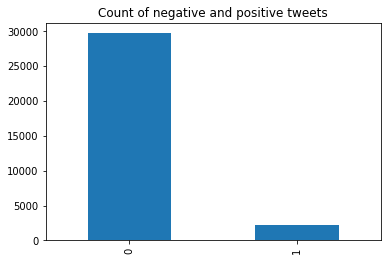

In [10]:
data['label'].value_counts().plot(kind='bar' , title="Count of negative and positive tweets")

# Basic NLTK

In [12]:
example = data['tweet'][50]
print(example)

#abc2020 getting ready 2 remove the victums frm #pulseclub #prayfororlando  


In [15]:
tokens = nltk.word_tokenize(example)
tokens

['#',
 'abc2020',
 'getting',
 'ready',
 '2',
 'remove',
 'the',
 'victums',
 'frm',
 '#',
 'pulseclub',
 '#',
 'prayfororlando']

In [18]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('#', '#'), ('abc2020', 'NN'), ('getting', 'VBG'), ('ready', 'JJ'), ('2', 'CD'), ('remove', 'VB'), ('the', 'DT'), ('victums', 'NNS'), ('frm', 'RB'), ('#', '#'), ('pulseclub', 'JJ'), ('#', '#'), ('prayfororlando', 'NN')]


In [29]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [25]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  #/#
  abc2020/NN
  getting/VBG
  ready/JJ
  2/CD
  remove/VB
  the/DT
  victums/NNS
  frm/RB
  #/#
  pulseclub/JJ
  #/#
  prayfororlando/NN)


# Vader Sentiment Scoring
we will use NLTK's SentimentIntensityAnalyzer to get the neg/pos scores of the text.
 - This uses a "bag of words" approach:
    1. Stop words are removes.
    2. each word is scored and combined to a total score.

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [31]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [32]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [33]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

In [63]:
# Run the polarity score on the entire dataset:
res = {}
for row in data.iterrows():
    tweet = row[1]['tweet']
    myid = row[1]['id']
    res[myid] = sia.polarity_scores(tweet)
    res[myid]['pos'] = res[myid]['pos'] + res[myid]['neu']

In [68]:
vaders = pd.DataFrame(res).T
vaders = vaders.drop('neu', axis=1)
vaders = vaders.reset_index().rename(columns = {'index':'id'})
vaders = vaders.merge(data,how='left')

In [69]:
vaders.head()

,id,neg,pos,compound,label,tweet
0,1,0.385,0.615,-0.8296,0,@user when a father is dysfunctional and is s...
1,2,0.000,1.000,0.6705,0,@user @user thanks for #lyft credit i can't us...
2,3,0.000,1.000,0.0000,0,bihday your majesty
3,4,0.000,1.000,0.7249,0,#model i love u take with u all the time in ...
4,5,0.000,1.000,0.0000,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='compound'>

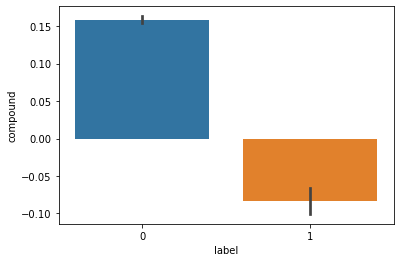

In [73]:
sns.barplot(data=vaders, x='label', y='compound')